In [34]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [35]:
income_statement = pd.read_excel("canara_bank_income_statement_cia1.xlsx")
balance_sheet = pd.read_excel("canara_bank_balance_sheet_cia1.xlsx")
cash_flow = pd.read_excel("canara_bank_Cash_flow_cia1.xlsx")

**Ratio**

1. **Profitability**
- **Gross Profit Margin** - Measures How much money is left after accounting the direct cost of production. (Net Sales - COGS)/ Net Sales 
- **Net Profit Margin** - Measures the percentage of the revenue left after accounting all the expenses (Net Income/Total Revenue) or (Net Income/Total Revenue) * 100
- **Return on Equity** - How much money the company generate with the money that the share holder invested  (Net Income / ShareHolder)
- **Return on Assets** - How much maney it generats for every dollar of assets it owns. (Net Income /Total Asset)

2. **Liquidity**
- **current ratio** - measures a company's ability to pay off short term liabilities using its current assets (current assets / current liabilities )
- **quick ratio** - ability to pay off short term liabilities using the most liquid assets  (current assets - inventory - prepaid expenses) / current Liabilities 

3. **Solvency**
- **Debt to equity ratio** - companies total liability to its shareholder equity, how much debt a company uses to finance its assets relative to the money investors by its owners (toatl debt / sharesholer equity)

- **inerest coverage ratio** - A company's ability to pay back interest expense using its EBIT (EBIT / interest expense)


4. **effcenecy**

- **inventory turnover** - How many time a company sells and replace its inventory over a period (COGS / average inventory)
- **Receivable Turnover** - How effectively a company collect credit from customer within specific period of time (net credit sales / average accounts receivable)
- **Toat assets turnover ratio** - measure how effcient a company is in generating sales from its assets (Net sales / average total assets)


**DCF**

* Forecast The Free Cash Flow (FCF)
* Calculate WACC Weigthed average cost of capital
* Calculate the terminal value 
* Discount the Free Cash Flow and Terminal Value 
* Calculate the implied Share Price 

**DCF Valuation Steps**

Project Free Cash Flows (FCF): Estimate company cash flows (usually 5–10 years). For most models, use unlevered free cash flows, which are available to all providers of capital and not affected by the capital structure.​

Choose Discount Rate: Apply either Weighted Average Cost of Capital (WACC) for firm-level DCF or Cost of Equity for equity-focused DCF. Use CAPM or other methods to estimate risk and discount rate.

Calculate Terminal Value: Estimate the company’s value beyond the explicit forecast using a stable perpetuity growth rate (Gordon Growth Model) or an exit multiple.​

Discount FCF and Terminal Value: Use the discount rate to convert all future values into present value.

Sum for Enterprise Value: Total discounted FCF and discounted terminal value to get implied enterprise value. Subtract net debt for equity value when needed.

**Start: Select company and collect historical data.**

Project Free Cash Flows ➡️ Choose Discount Rate ➡️ Calculate Terminal Value ➡️ Discount and Sum Values ➡️ Get Enterprise/Equity Value.




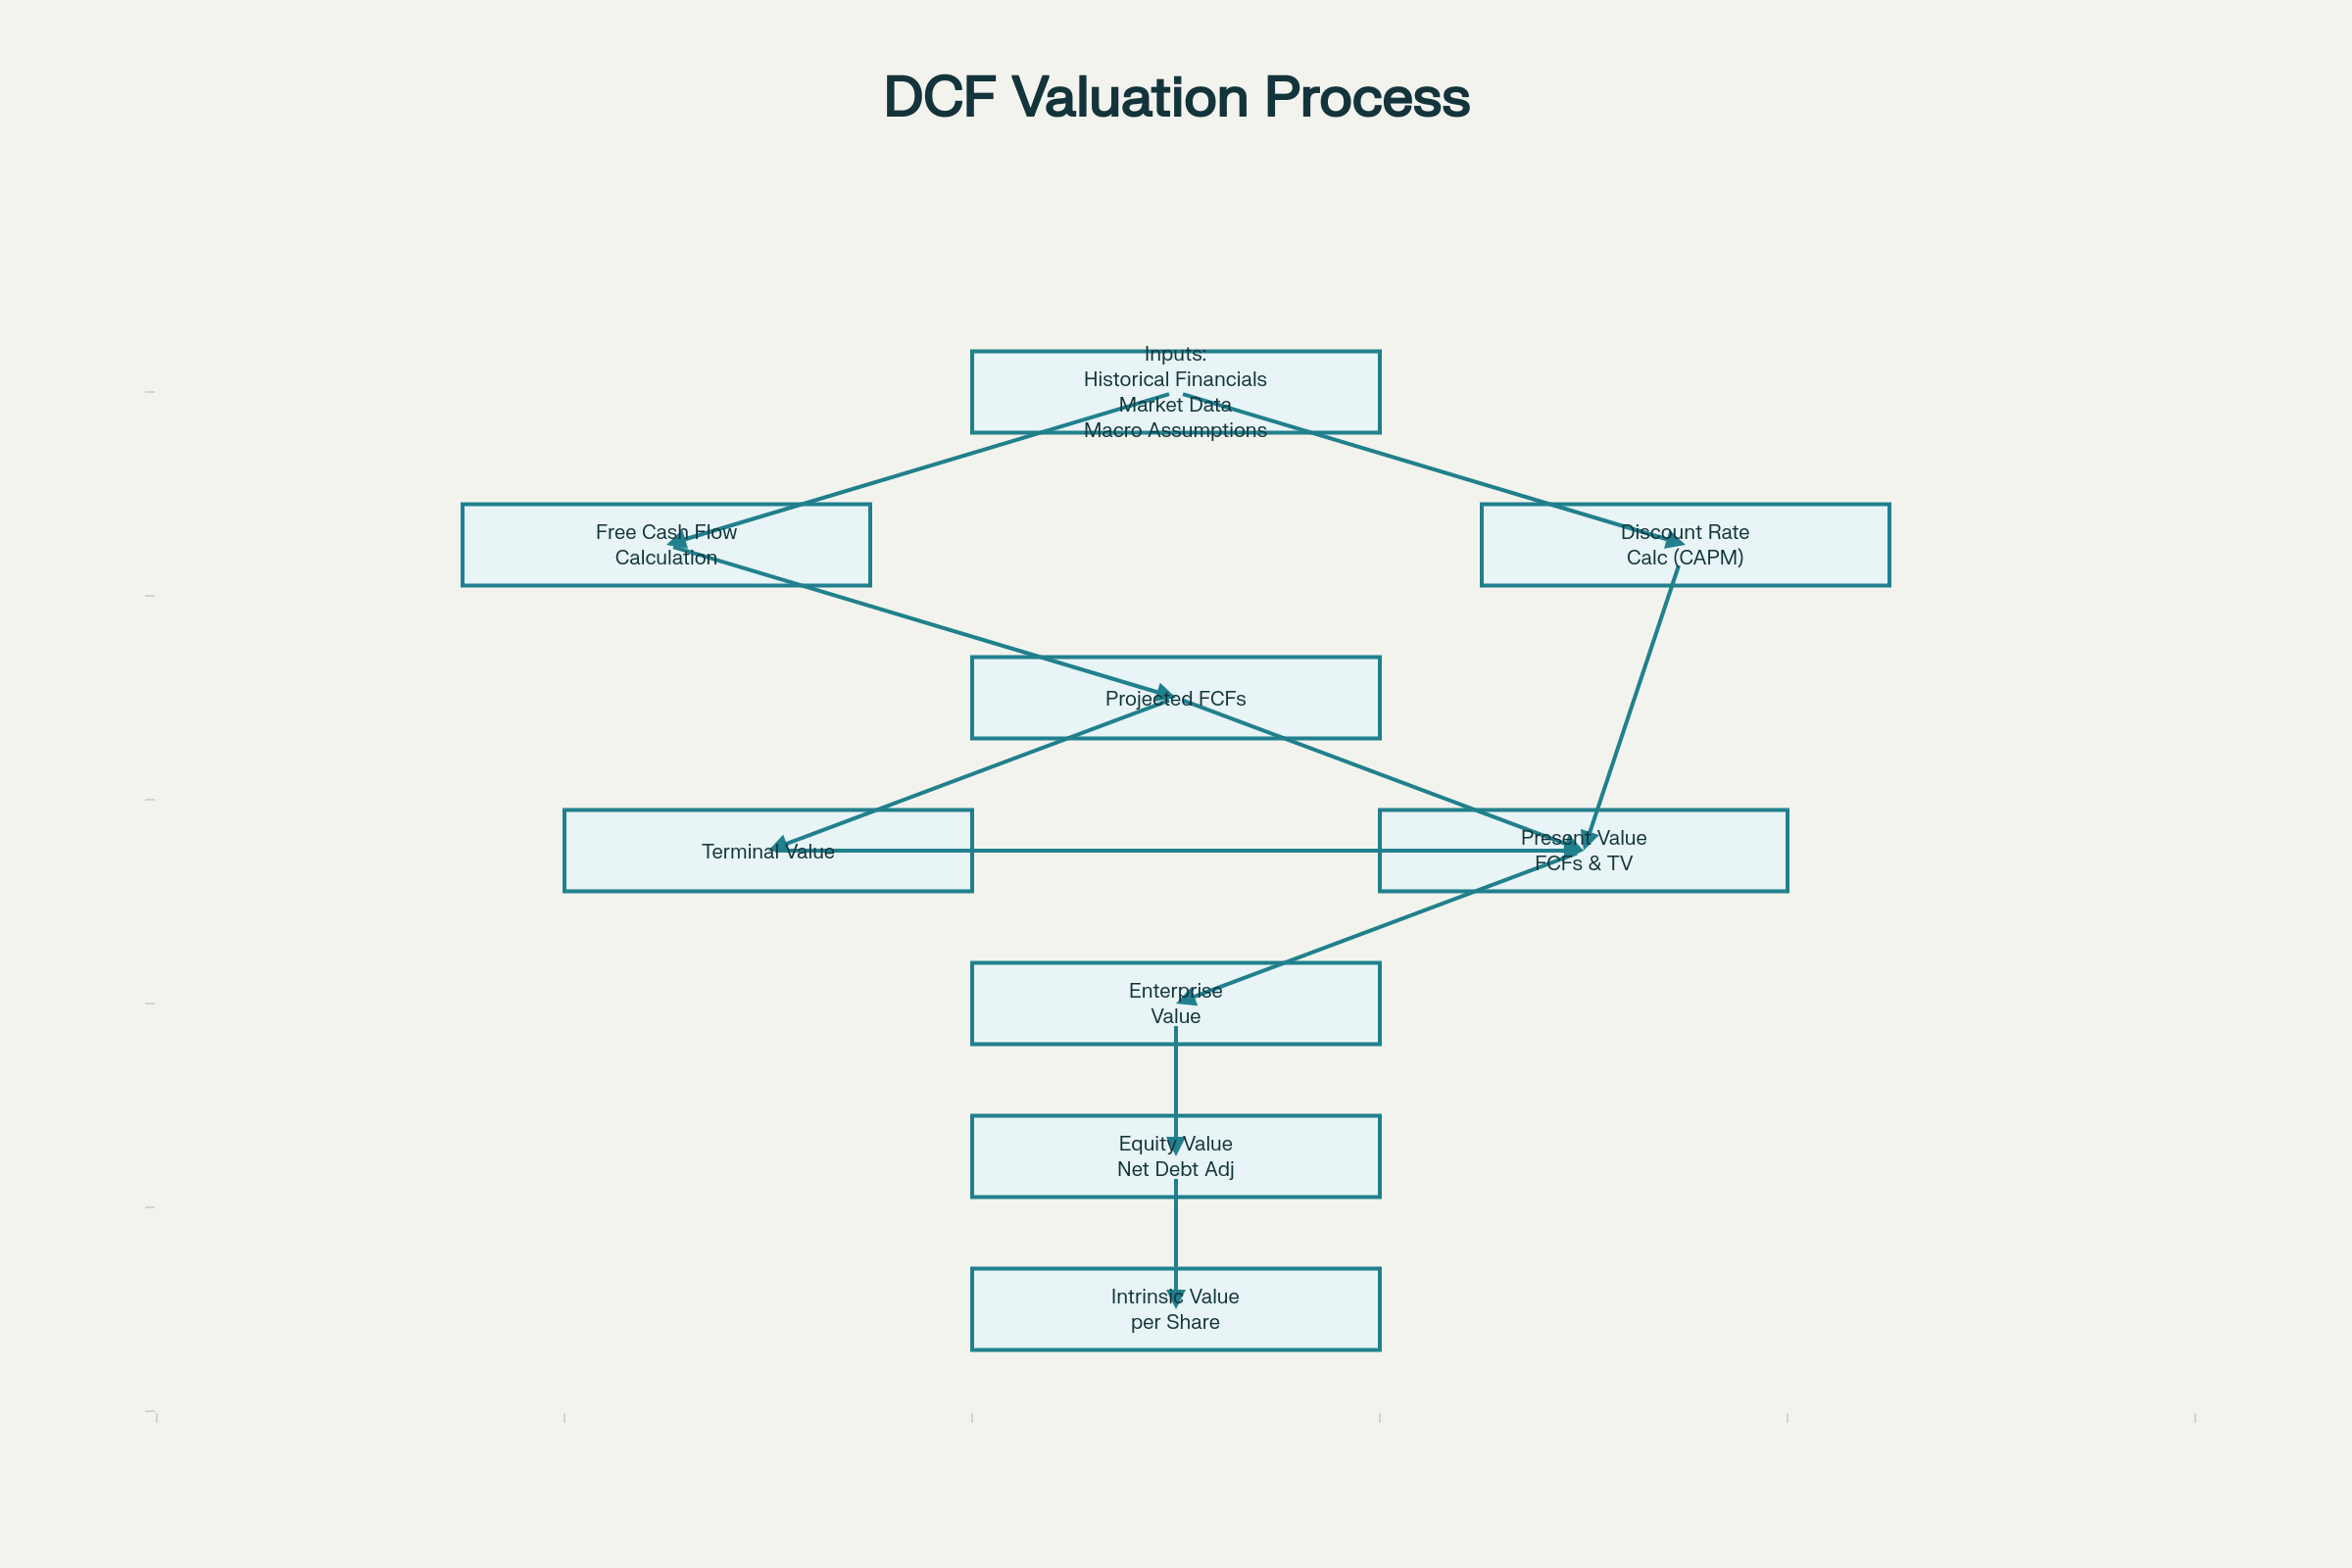


1. **FCF - Cash Flow available to both debt and equity holder after the company pay off for everything it need to continue the business.**

* FCF = (EBIT * (1 - TAX RATE)) + Depreciation & Amortization - Cap Exp - increase in non cash working cap **will a** Decrease in non cash working cap is +ADD

* non cash working capital = Current assets - cash - current liabilities

2. **WACC Weighted average cost of capital**

* WACC = (EQUITY/ EQUIT + DEBT) * Cost of EQUITY + (DEBT/ EQUITY + DEBT) * cost of DEBT * (1 - T)

3. **Terminal Value: Value which beyond the forecasted period**

 Perpetuity Growth fromula (TV = ((FCFn * (1+g))/WACC - g))

4. Discounting Factor 

1/(1+WACC)**T

5. Enterprise Value = Total Discounted FCF and discounted rate 

In [36]:
balance_sheet.set_index('Year', inplace =True )
income_statement.set_index('Year', inplace = True)
cash_flow.set_index('Year', inplace=True)

In [37]:
print(f"balance_sheet.columns{balance_sheet.columns}")
print(f"balance_sheet.index{balance_sheet.index}")
print(f"income_statement.index{income_statement.index}")
print(f"income_statement.columns{income_statement.columns}")
print(f"cash_flow index {(cash_flow.index).to_list()}")
print(f"cash_flow.columns{cash_flow.columns}")

balance_sheet.columnsIndex([               'Mar 25',     2025-03-01 00:00:00,
           2024-03-01 00:00:00, '2024-03-01 00:00:00.1',
           2023-03-01 00:00:00],
      dtype='object')
balance_sheet.indexIndex(['Equity Share Capital', 'Total Share Capital', 'Revaluation Reserve',
       'Reserves and Surplus', 'Total Reserves and Surplus',
       'Total ShareHolders Funds', 'Minority Interest', 'Deposits',
       'Borrowings', 'Other Liabilities and Provisions',
       'Total Capital and Liabilities',
       'Cash and Balances with Reserve Bank of India',
       'Balances with Banks Money at Call and Short Notice', 'Investments',
       'Advances', 'Fixed Assets', 'Other Assets', 'Total Assets'],
      dtype='object', name='Year')
income_statement.indexIndex(['Interest Earned', 'Other Income', 'Total Income', 'Interest expended',
       'Employee Cost', 'Selling, Admin & Misc Expenses', 'Depreciation',
       'Operating Expenses', 'Provisions & Contingencies', 'Total Expenses',
  

In [38]:
import numpy as np
import pandas as pd


# -----------------------------
# 1. CLEAN BALANCE SHEET COLUMNS
# -----------------------------
bs = balance_sheet.copy()
is_df = income_statement.copy()
cf = cash_flow.copy()

# Convert all column names to string for easy mapping
bs.columns = bs.columns.map(str)

rename_dict = {
    'Mar 25': "Mar '25",
    '2025-03-01 00:00:00': "Mar '25",
    '2024-03-01 00:00:00': "Mar '24",
    '2024-03-01 00:00:00.1': "Mar '24",
    '2023-03-01 00:00:00': "Mar '23"
}

bs = bs.rename(columns=rename_dict)

# If there are duplicate columns for a year (e.g., 2 columns for 2024), keep the first
bs = bs.groupby(axis=1, level=0).first()

# Choose 3 years common across all
years = ["Mar '23", "Mar '24", "Mar '25"]

bs = bs[years]
is_df = is_df[years]
cf = cf[years]

print("Cleaned balance_sheet.columns:", bs.columns)
print("income_statement.columns:", is_df.columns)
print("cash_flow.columns:", cf.columns)

# ---------------------------------------
# 2. CALCULATE RATIOS FOR EACH YEAR
# ---------------------------------------

ratio_dict = {
    "Year": [],
    
    # Profitability
    "Gross Profit Margin": [],
    "Net Profit Margin": [],
    "Return on Equity (ROE)": [],
    "Return on Assets (ROA)": [],
    
    # Liquidity
    "Current Ratio": [],
    "Quick Ratio": [],
    
    # Solvency
    "Debt to Equity": [],
    "Interest Coverage Ratio": [],
    
    # Efficiency
    "Receivable Turnover": [],
    "Total Asset Turnover": []
    # (Skipping Inventory Turnover because banks don't have inventory)
}

for y in years:
    ratio_dict["Year"].append(y)
    
    # ---- Income Statement elements ----
    total_income = is_df.loc["Total Income", y]              
    interest_exp = is_df.loc["Interest expended", y]
    total_expenses = is_df.loc["Total Expenses", y]
    net_profit = is_df.loc["Net Profit for the Year", y]
    
    # ---- Balance Sheet elements ----
    equity = bs.loc["Total ShareHolders Funds", y]
    total_assets = bs.loc["Total Assets", y]
    deposits = bs.loc["Deposits", y]
    borrowings = bs.loc["Borrowings", y]
    other_liab = bs.loc["Other Liabilities and Provisions", y]
    
    cash_rbi = bs.loc["Cash and Balances with Reserve Bank of India", y]
    bal_banks = bs.loc["Balances with Banks Money at Call and Short Notice", y]
    investments = bs.loc["Investments", y]
    advances = bs.loc["Advances", y]
    other_assets = bs.loc["Other Assets", y]
    
    # ---- Cash Flow elements ----
    pbt = cf.loc["Net Profit Before Tax", y]
    
    # ----------------------------
    # PROFITABILITY RATIOS
    # ----------------------------
    # Gross Profit Margin ≈ (Total Income - Interest expended) / Total Income
    gross_profit = total_income - interest_exp
    gpm = gross_profit / total_income
    
    # Net Profit Margin = Net Profit / Total Income
    npm = net_profit / total_income
    
    # ROE = Net Profit / Shareholders' Equity
    roe = net_profit / equity
    
    # ROA = Net Profit / Total Assets
    roa = net_profit / total_assets
    
    ratio_dict["Gross Profit Margin"].append(gpm)
    ratio_dict["Net Profit Margin"].append(npm)
    ratio_dict["Return on Equity (ROE)"].append(roe)
    ratio_dict["Return on Assets (ROA)"].append(roa)
    
    # ----------------------------
    # LIQUIDITY RATIOS
    # ----------------------------
    # Current Assets (proxy)
    current_assets = cash_rbi + bal_banks + investments + advances + other_assets
    # Current Liabilities (proxy)
    current_liab = deposits + borrowings + other_liab
    
    current_ratio = current_assets / current_liab
    
    # Quick Assets (proxy) = cash + bank balances + investments
    quick_assets = cash_rbi + bal_banks + investments
    quick_ratio = quick_assets / current_liab
    
    ratio_dict["Current Ratio"].append(current_ratio)
    ratio_dict["Quick Ratio"].append(quick_ratio)
    
    # ----------------------------
    # SOLVENCY RATIOS
    # ----------------------------
    # Debt = Borrowings (you can also add Deposits if you justify it)
    total_debt = borrowings
    debt_to_equity = total_debt / equity
    
    # EBIT = PBT + Interest expended
    ebit = pbt + interest_exp
    interest_coverage = ebit / interest_exp
    
    ratio_dict["Debt to Equity"].append(debt_to_equity)
    ratio_dict["Interest Coverage Ratio"].append(interest_coverage)
    
    # ----------------------------
    # EFFICIENCY RATIOS
    # ----------------------------
    # Receivable Turnover: Total Income / Advances (proxy for receivables)
    receivable_turnover = total_income / advances
    
    # Total Asset Turnover: Total Income / Total Assets
    total_asset_turnover = total_income / total_assets
    
    ratio_dict["Receivable Turnover"].append(receivable_turnover)
    ratio_dict["Total Asset Turnover"].append(total_asset_turnover)

# Convert to DataFrame with Years as index
ratio_df = pd.DataFrame(ratio_dict).set_index("Year")
ratio_df


Cleaned balance_sheet.columns: Index(['Mar '23', 'Mar '24', 'Mar '25'], dtype='object')
income_statement.columns: Index(['Mar '23', 'Mar '24', 'Mar '25'], dtype='object')
cash_flow.columns: Index(['Mar '23', 'Mar '24', 'Mar '25'], dtype='object')


C:\Users\Predator\AppData\Local\Temp\ipykernel_59940\483584703.py:26: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  bs = bs.groupby(axis=1, level=0).first()


,Gross Profit Margin,Net Profit Margin,Return on Equity (ROE),Return on Assets (ROA),Current Ratio,Quick Ratio,Debt to Equity,Interest Coverage Ratio,Receivable Turnover,Total Asset Turnover
Year,,,,,,,,,,
Mar '23,0.486471,-0.028485,-0.037657,-0.002128,1.052703,0.379853,0.744015,1.200111,0.124183,0.074717
Mar '24,0.435021,0.037967,0.052605,0.003157,1.056040,0.381703,0.624504,1.201802,0.137000,0.083162
Mar '25,0.418576,0.058106,0.078385,0.004774,1.059298,0.389191,0.850577,1.205927,0.135522,0.082168


In [39]:
def trend_direction(series):
    first = series.iloc[0]
    last = series.iloc[-1]
    if last > first:
        return "Upward"
    elif last < first:
        return "Downward"
    else:
        return "Flat / No clear change"

for col in ratio_df.columns:
    direction = trend_direction(ratio_df[col])
    print(f"{col}: {direction} trend from {ratio_df.index[0]} to {ratio_df.index[-1]}")


Gross Profit Margin: Downward trend from Mar '23 to Mar '25
Net Profit Margin: Upward trend from Mar '23 to Mar '25
Return on Equity (ROE): Upward trend from Mar '23 to Mar '25
Return on Assets (ROA): Upward trend from Mar '23 to Mar '25
Current Ratio: Upward trend from Mar '23 to Mar '25
Quick Ratio: Upward trend from Mar '23 to Mar '25
Debt to Equity: Upward trend from Mar '23 to Mar '25
Interest Coverage Ratio: Upward trend from Mar '23 to Mar '25
Receivable Turnover: Upward trend from Mar '23 to Mar '25
Total Asset Turnover: Upward trend from Mar '23 to Mar '25


In [40]:
# CLEAN BALANCE SHEET COLUMN NAMES
bs = balance_sheet.copy()
is_df = income_statement.copy()
cf = cash_flow.copy()

# Convert all to string for mapping
bs.columns = bs.columns.map(str)

rename_dict = {
    'Mar 25': "Mar '25",
    "2025-03-01 00:00:00": "Mar '25",
    "2024-03-01 00:00:00": "Mar '24",
    "2024-03-01 00:00:00.1": "Mar '24",
    "2023-03-01 00:00:00": "Mar '23"
}

# Rename using dictionary
bs = bs.rename(columns=rename_dict)

# Remove duplicate columns (take first)
bs = bs.groupby(axis=1, level=0).first()

# Keep only the 3 years we need
years = ["Mar '23", "Mar '24", "Mar '25"]

balance_sheet = bs[years]
income_statement = is_df[years]
cash_flow = cf[years]

print(balance_sheet.columns)


Index(['Mar '23', 'Mar '24', 'Mar '25'], dtype='object')


C:\Users\Predator\AppData\Local\Temp\ipykernel_59940\1947898713.py:21: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  bs = bs.groupby(axis=1, level=0).first()


In [41]:
print(f"balance_sheet.columns{balance_sheet.columns}")
print(f"balance_sheet.index{balance_sheet.index}")
print(f"income_statement.index{income_statement.index}")
print(f"income_statement.columns{income_statement.columns}")
print(f"cash_flow index {(cash_flow.index).to_list()}")
print(f"cash_flow.columns{cash_flow.columns}")

balance_sheet.columnsIndex(['Mar '23', 'Mar '24', 'Mar '25'], dtype='object')
balance_sheet.indexIndex(['Equity Share Capital', 'Total Share Capital', 'Revaluation Reserve',
       'Reserves and Surplus', 'Total Reserves and Surplus',
       'Total ShareHolders Funds', 'Minority Interest', 'Deposits',
       'Borrowings', 'Other Liabilities and Provisions',
       'Total Capital and Liabilities',
       'Cash and Balances with Reserve Bank of India',
       'Balances with Banks Money at Call and Short Notice', 'Investments',
       'Advances', 'Fixed Assets', 'Other Assets', 'Total Assets'],
      dtype='object', name='Year')
income_statement.indexIndex(['Interest Earned', 'Other Income', 'Total Income', 'Interest expended',
       'Employee Cost', 'Selling, Admin & Misc Expenses', 'Depreciation',
       'Operating Expenses', 'Provisions & Contingencies', 'Total Expenses',
       'Net Profit for the Year', 'Total', 'Equity Dividend',
       'Earning Per Share (Rs)', 'Equity Dividend (%

In [42]:
# AUTO TERMINAL GROWTH RATE: Conservative Avg from IMF/World Bank Forecasts (2025-2030)
# Based on latest data: 6.5% real GDP avg; use 5.0% nominal perpetuity (conservative)
terminal_growth_rate_raw = 0.065  
terminal_growth_rate = max(0, min(terminal_growth_rate_raw - 0.015, 0.06))  # Adjust down 1.5% for risk, cap 0-6%
print("AUTO Terminal Growth Rate (IMF/World Bank Avg, Conservative):", round(terminal_growth_rate * 100, 1), "%")

AUTO Terminal Growth Rate (IMF/World Bank Avg, Conservative): 5.0 %


In [43]:
# Fetch 5-year daily price data
canbk = yf.download('CANBK.NS', period='5y', auto_adjust=False, progress=False)['Adj Close']
nifty_bank = yf.download('^NSEBANK', period='5y', auto_adjust=False, progress=False)['Adj Close']

# Daily returns
returns_can = canbk.pct_change().dropna()
returns_bank = nifty_bank.pct_change().dropna()

# Align dates
common_dates = returns_can.index.intersection(returns_bank.index)
returns_can = returns_can.loc[common_dates]
returns_bank = returns_bank.loc[common_dates]

# If either dataset is empty
if len(returns_can) == 0 or len(returns_bank) == 0:
    beta = 1.0
else:
    # Convert to arrays
    r_can = returns_can.values.flatten()
    r_bank = returns_bank.values.flatten()

    
    cov = np.cov(r_can, r_bank)[0][1]
    var = np.var(r_bank)

    beta = cov / var if var > 0 else 1.0

print("Canara Bank Beta vs NIFTY BANK:", round(beta, 2))


Canara Bank Beta vs NIFTY BANK: 1.28


In [44]:
# Helper function (updated to return np.nan)
def safe_loc(df, key, year):
    if key in df.index:
        return df.loc[key, year]
    return np.nan  # Use np.nan for boolean compatibility

# AUTO GROWTH RATE: 5-Year CAGR of Net Profit
num_years = 5  # Target period
available_years = len(income_statement.columns)
use_years = min(num_years, available_years)

if use_years >= 2:
    years = income_statement.columns[-use_years:]
    net_profits = []
    for y in years:
        # Prioritize keys; assign first non-NaN value
        np_val = np.nan
        for key in ["Net Income", "Net Income Common Stockholders", "Net Profit for the Year"]:
            val = safe_loc(income_statement, key, y)
            if pd.notna(val):
                np_val = val
                break  # Stop at first valid
        
        # Optional: Debug available keys (uncomment if needed)
        # print(f"For year {y}: Tried keys, got np_val={np_val}")
        
        if pd.notna(np_val) and np_val > 0:
            net_profits.append(float(np_val))
    
    if len(net_profits) >= 2:
        cagr = (net_profits[-1] / net_profits[0]) ** (1 / (len(net_profits) - 1)) - 1
        growth_rate = max(0, min(cagr, 0.15))  # Cap 0-15%
        print("AUTO Growth Rate (5Y Net Profit CAGR):", round(growth_rate * 100, 1), "%")
    else:
        growth_rate = 0.05
        print(f"Growth Rate (Fallback): 5.0% (Only {len(net_profits)} valid years of positive net profits)")
else:
    growth_rate = 0.05
    print("Growth Rate (Fallback): 5.0% (Limited historical data)")

print("Final growth_rate:", growth_rate)

AUTO Growth Rate (5Y Net Profit CAGR): 15.0 %
Final growth_rate: 0.15


In [45]:
# AUTO WACC USING CAPM
risk_free_rate = 0.071    # India 10yr G-Sec yield
market_risk_premium = 0.06

# [Insert the beta calculation code from above here]

# Use the calculated beta (default to 1 if needed)
beta = beta  # From calculation above
discount_rate = risk_free_rate + beta * market_risk_premium
discount_rate = float(discount_rate)
print("AUTO Discount Rate (WACC/Cost of Equity):", round(discount_rate * 100, 2), "%")

AUTO Discount Rate (WACC/Cost of Equity): 14.75 %


In [46]:

# --------------------------------------------------------
# 1. BASIC SETUP: TICKER & LATEST YEAR
# --------------------------------------------------------
ticker_symbol = "CANBK.NS"
canbk = yf.Ticker(ticker_symbol)

latest_year = "Mar '25"   

# --------------------------------------------------------
# 2. FETCH MARKET DATA FROM YFINANCE
# --------------------------------------------------------
hist = canbk.history(period="1d")
current_price = float(hist["Close"][-1])

info = canbk.info  # dictionary of fundamentals

# Market Cap and Shares Outstanding
if "marketCap" in info and info["marketCap"] is not None:
    market_cap = float(info["marketCap"])
else:
    market_cap = np.nan

if "sharesOutstanding" in info and info["sharesOutstanding"] is not None:
    shares_outstanding = float(info["sharesOutstanding"])
else:
    # fallback: approximate from Equity Share Capital if needed
    # Equity Share Capital in crore, assume face value = ₹10
    equity_capital_crore = balance_sheet.loc["Equity Share Capital", latest_year]
    equity_capital = equity_capital_crore * 1e7  # crore to rupees
    shares_outstanding = equity_capital / 10     # assuming FV = ₹10

# Enterprise Value (EV) if available
if "enterpriseValue" in info and info["enterpriseValue"] is not None:
    enterprise_value = float(info["enterpriseValue"])
else:
    enterprise_value = market_cap  # approximation

print("Current Share Price (₹):", round(current_price, 2))
print("Market Cap (₹):", market_cap)
print("Shares Outstanding:", shares_outstanding)
print("Enterprise Value (₹):", enterprise_value)

# --------------------------------------------------------
# 3. EXTRACT KEY FINANCIALS FROM YOUR STATEMENTS
# --------------------------------------------------------
# Income statement data
total_income = income_statement.loc["Total Income", latest_year]
net_profit = income_statement.loc["Net Profit for the Year", latest_year]
eps = income_statement.loc["Earning Per Share (Rs)", latest_year]
interest_exp = income_statement.loc["Interest expended", latest_year]
depr = income_statement.loc["Depreciation", latest_year]

# Balance sheet data
equity = balance_sheet.loc["Total ShareHolders Funds", latest_year]
book_value_per_share = income_statement.loc["Book Value (Rs)", latest_year]

# Cash flow data
net_cfo = cash_flow.loc["Net Cash From Operating Activities", latest_year]  # proxy for FCF

print("\n=== Key Financials (Latest Year) ===")
print("Total Income (₹ crore):", total_income)
print("Net Profit (₹ crore):", net_profit)
print("EPS (₹):", eps)
print("Book Value per Share (₹):", book_value_per_share)
print("Net Cash from Operating Activities (₹ crore) [FCF proxy]:", net_cfo)

# --------------------------------------------------------
# 4. DCF VALUATION
# --------------------------------------------------------
# Assumptions – Change these as you like
fcf_base = net_cfo             # in ₹ crore
growth_rate = growth_rate 
discount_rate = discount_rate         
terminal_growth_rate = terminal_growth_rate
projection_years = 5

# Project FCFs for next 5 years
fcf_list = []
for t in range(1, projection_years + 1):
    fcf_t = fcf_base * ((1 + growth_rate) ** t)
    fcf_list.append(fcf_t)

# Discount the projected FCFs to present value
pv_fcf_list = []
for t in range(1, projection_years + 1):
    pv_t = fcf_list[t-1] / ((1 + discount_rate) ** t)
    pv_fcf_list.append(pv_t)

# Terminal Value at end of Year 5 (in crore)
terminal_value = fcf_list[-1] * (1 + terminal_growth_rate) / (discount_rate - terminal_growth_rate)
pv_terminal_value = terminal_value / ((1 + discount_rate) ** projection_years)

# Enterprise Value from DCF (in crore)
dcf_enterprise_value_crore = sum(pv_fcf_list) + pv_terminal_value

# Convert to rupees (since market cap from yfinance is in rupees)
dcf_enterprise_value = dcf_enterprise_value_crore * 1e7  # crore → rupees

# Intrinsic equity value ≈ EV if we ignore net debt details for now
intrinsic_equity_value = dcf_enterprise_value

intrinsic_value_per_share = intrinsic_equity_value / shares_outstanding

print("\n=== DCF Valuation ===")
print("Projected FCFs (₹ crore):", [round(x, 2) for x in fcf_list])
print("PV of FCFs (₹ crore):", [round(x, 2) for x in pv_fcf_list])
print("PV of Terminal Value (₹ crore):", round(pv_terminal_value, 2))
print("DCF Enterprise/Equity Value (₹ crore):", round(dcf_enterprise_value_crore, 2))
print("Intrinsic Value per Share (₹):", round(intrinsic_value_per_share, 2))
print("Current Market Price (₹):", round(current_price, 2))

if intrinsic_value_per_share > current_price * 1.1:
    conclusion_dcf = "Undervalued (DCF suggests upside)"
elif intrinsic_value_per_share < current_price * 0.9:
    conclusion_dcf = "Overvalued (DCF suggests downside)"
else:
    conclusion_dcf = "Fairly valued (DCF close to market price)"

print("DCF Valuation Conclusion:", conclusion_dcf)

# --------------------------------------------------------
# 5. MULTIPLES VALUATION: P/E, P/B, EV/EBITDA
# --------------------------------------------------------

# P/E using EPS from your statement
pe_manual = current_price / eps

# P/B using Book Value per Share
pb_manual = current_price / book_value_per_share

# EBITDA ≈ EBIT + Depreciation
pbt = cash_flow.loc["Net Profit Before Tax", latest_year]
ebit = pbt + interest_exp        # EBIT in ₹ crore
ebitda_crore = ebit + depr       # EBITDA approx in ₹ crore

# EV/EBITDA
# Need EV in crore for consistency
ev_crore = enterprise_value / 1e7
if ebitda_crore != 0:
    ev_ebitda = ev_crore / ebitda_crore
else:
    ev_ebitda = np.nan

print("\n=== Multiples Valuation ===")
print("P/E (Price / EPS):", round(pe_manual, 2))
print("P/B (Price / Book Value per Share):", round(pb_manual, 2))
print("EV/EBITDA:", round(ev_ebitda, 2))

# If yfinance provides their own PE & PB, print for comparison
if "trailingPE" in info and info["trailingPE"] is not None:
    print("Trailing PE (yfinance):", round(info["trailingPE"], 2))
if "priceToBook" in info and info["priceToBook"] is not None:
    print("Price to Book (yfinance):", round(info["priceToBook"], 2))




C:\Users\Predator\AppData\Local\Temp\ipykernel_59940\1715540527.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = float(hist["Close"][-1])


Current Share Price (₹): 146.67
Market Cap (₹): 1330392465408.0
Shares Outstanding: 9070651260.0
Enterprise Value (₹): 329927819264.0

=== Key Financials (Latest Year) ===
Total Income (₹ crore): 142207.87
Net Profit (₹ crore): 8263.08
EPS (₹): 45.55
Book Value per Share (₹): 515.12
Net Cash from Operating Activities (₹ crore) [FCF proxy]: 59946.57

=== DCF Valuation ===
Projected FCFs (₹ crore): [np.float64(68938.56), np.float64(79279.34), np.float64(91171.24), np.float64(104846.93), np.float64(120573.96)]
PV of FCFs (₹ crore): [np.float64(60075.44), np.float64(60204.59), np.float64(60334.01), np.float64(60463.72), np.float64(60593.7)]
PV of Terminal Value (₹ crore): 652326.14
DCF Enterprise/Equity Value (₹ crore): 953997.6
Intrinsic Value per Share (₹): 1051.74
Current Market Price (₹): 146.67
DCF Valuation Conclusion: Undervalued (DCF suggests upside)

=== Multiples Valuation ===
P/E (Price / EPS): 3.22
P/B (Price / Book Value per Share): 0.28
EV/EBITDA: 0.33
Trailing PE (yfinance):

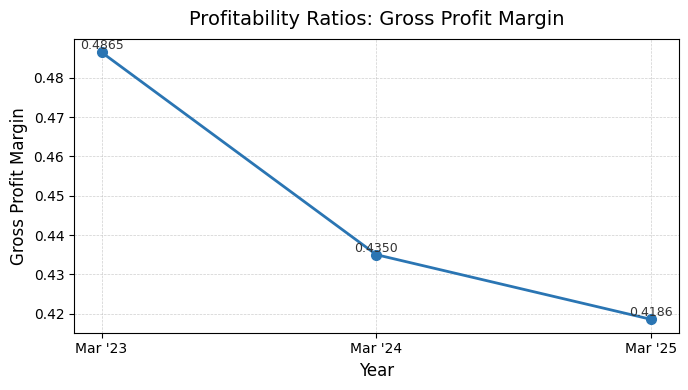

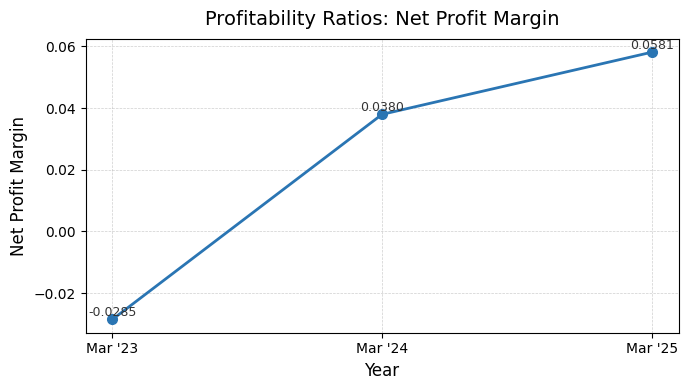

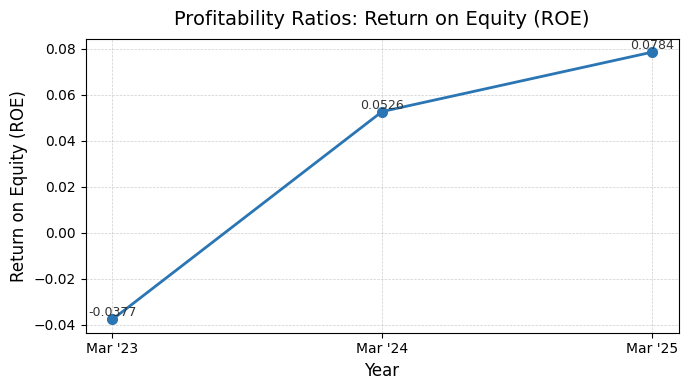

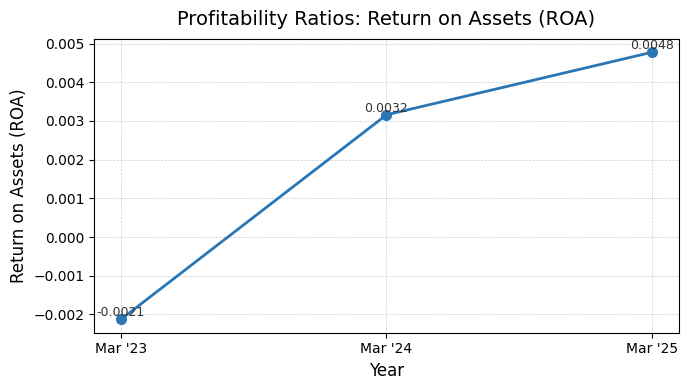

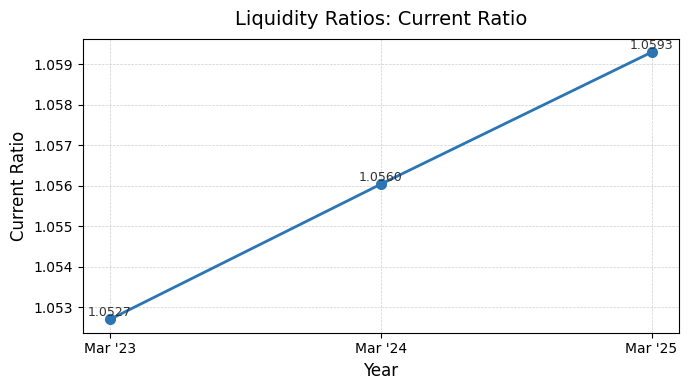

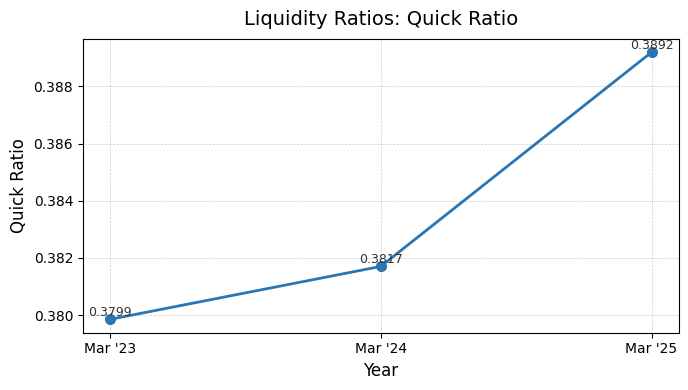

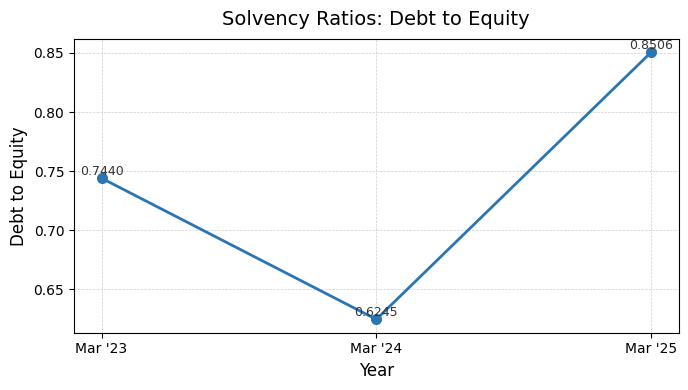

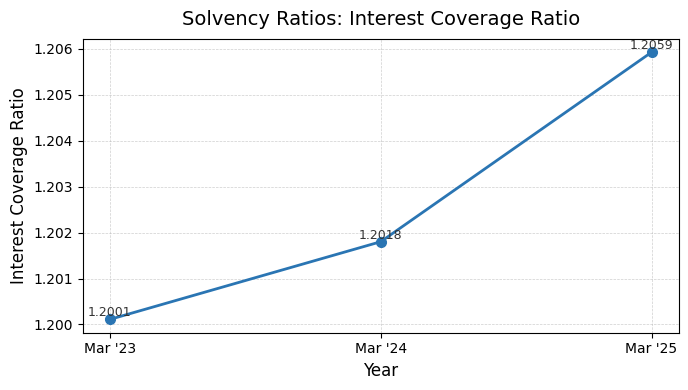

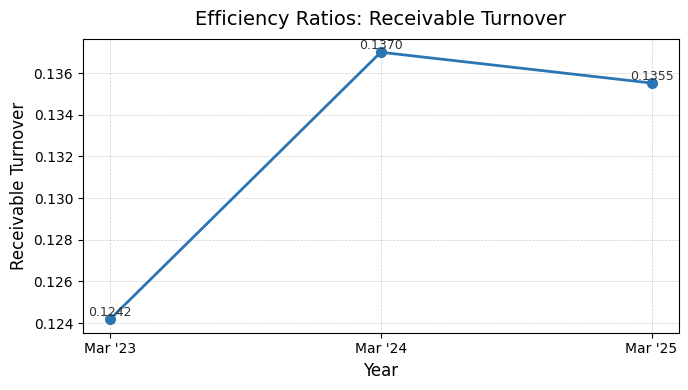

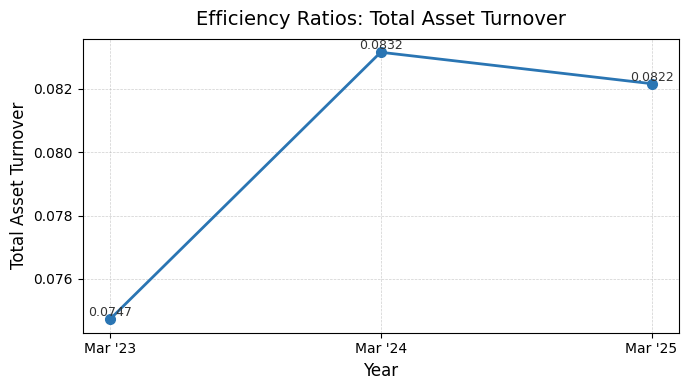

In [47]:
profitability = [
    "Gross Profit Margin",
    "Net Profit Margin",
    "Return on Equity (ROE)",
    "Return on Assets (ROA)"
]

liquidity = [
    "Current Ratio",
    "Quick Ratio"
]

solvency = [
    "Debt to Equity",
    "Interest Coverage Ratio"
]

efficiency = [
    "Receivable Turnover",
    "Total Asset Turnover"
]
import matplotlib.pyplot as plt

def plot_ratio_group(columns, title_prefix):
    for col in columns:
        plt.figure(figsize=(7,4))
        
        y = ratio_df[col]
        
        # Clean line chart
        plt.plot(
            ratio_df.index,
            y,
            marker='o',
            markersize=7,
            linewidth=2,
            color="#2A75B3"
        )
        
        # Titles and labels
        plt.title(f"{title_prefix}: {col}", fontsize=14, pad=10)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel(col, fontsize=12)
        
        # Simple grid
        plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

        # Add clean value labels above each point
        for i, val in enumerate(y):
            plt.text(
                i,
                val,
                f"{val:.4f}",
                ha='center',
                va='bottom',
                fontsize=9,
                color="#333333"
            )
        
        plt.tight_layout()
        plt.show()

# Generate all clean charts
plot_ratio_group(profitability, "Profitability Ratios")
plot_ratio_group(liquidity, "Liquidity Ratios")
plot_ratio_group(solvency, "Solvency Ratios")
plot_ratio_group(efficiency, "Efficiency Ratios")



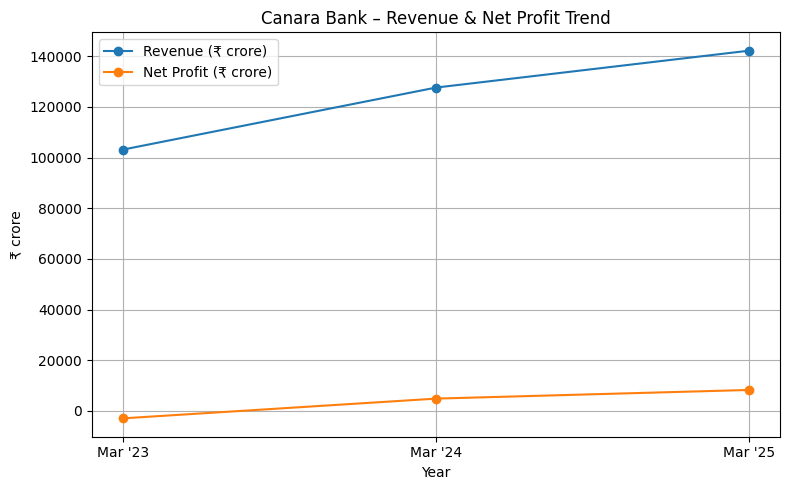

In [48]:
# ==========================
# REVENUE & NET PROFIT GROWTH
# ==========================

revenue = income_statement.loc["Total Income", years]
net_profit = income_statement.loc["Net Profit for the Year", years]

plt.figure(figsize=(8,5))
plt.plot(years, revenue, marker='o', label='Revenue (₹ crore)')
plt.plot(years, net_profit, marker='o', label='Net Profit (₹ crore)')
plt.title("Canara Bank – Revenue & Net Profit Trend")
plt.xlabel("Year")
plt.ylabel("₹ crore")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


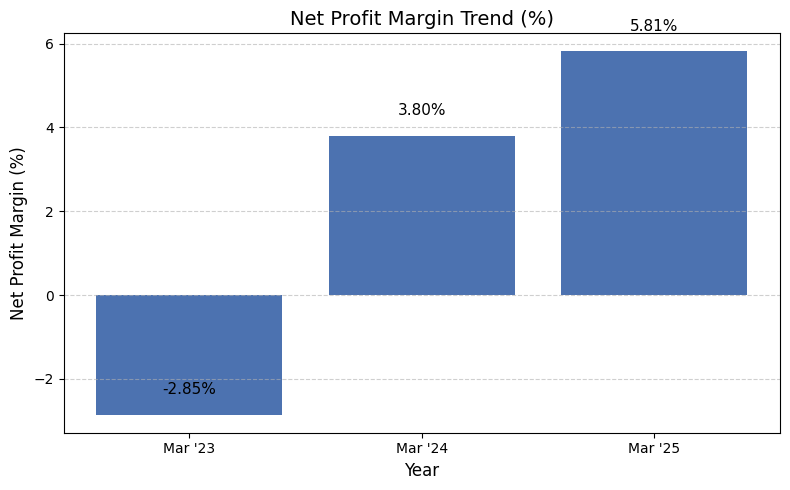

In [49]:
import matplotlib.pyplot as plt

# Convert to percentage
npm_pct = ratio_df["Net Profit Margin"] * 100

plt.figure(figsize=(8,5))
bars = plt.bar(npm_pct.index, npm_pct, color="#4C72B0")

# Title and labels
plt.title("Net Profit Margin Trend (%)", fontsize=14)
plt.ylabel("Net Profit Margin (%)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f"{height:.2f}%", ha='center', fontsize=11)

plt.tight_layout()
plt.show()


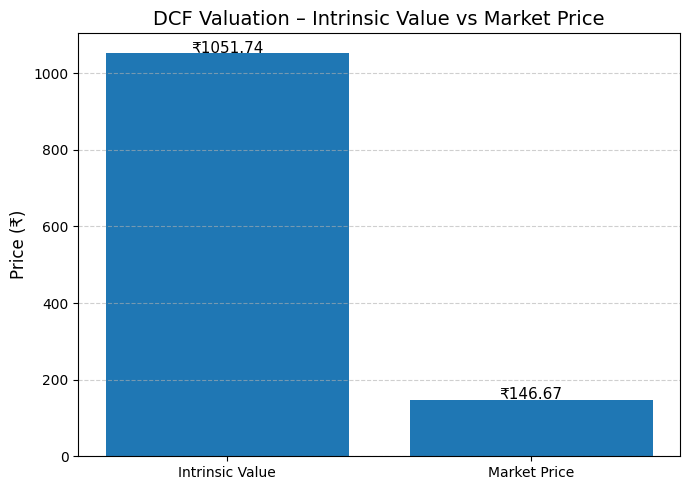

In [50]:
import matplotlib.pyplot as plt

# Prepare values
labels = ["Intrinsic Value", "Market Price"]
values = [intrinsic_value_per_share, current_price]

plt.figure(figsize=(7,5))
bars = plt.bar(labels, values)

# Title and labels
plt.title("DCF Valuation – Intrinsic Value vs Market Price", fontsize=14)
plt.ylabel("Price (₹)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 2,
             f"₹{height:.2f}",
             ha='center', fontsize=11)

plt.tight_layout()
plt.show()


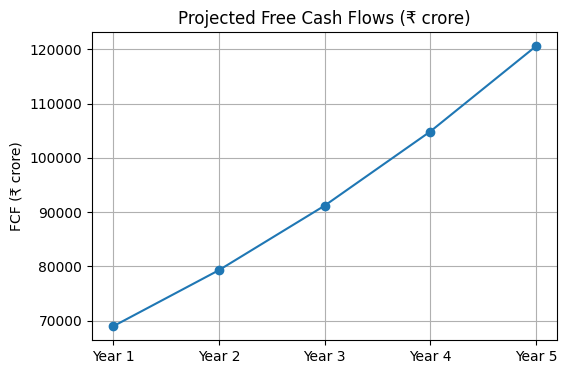

In [51]:
# ===============================
# PLOT FCF PROJECTION (5 years)
# ===============================

future_years = [f"Year {i}" for i in range(1, len(fcf_list)+1)]

plt.figure(figsize=(6,4))
plt.plot(future_years, fcf_list, marker='o')
plt.title("Projected Free Cash Flows (₹ crore)")
plt.ylabel("FCF (₹ crore)")
plt.grid(True)
plt.show()


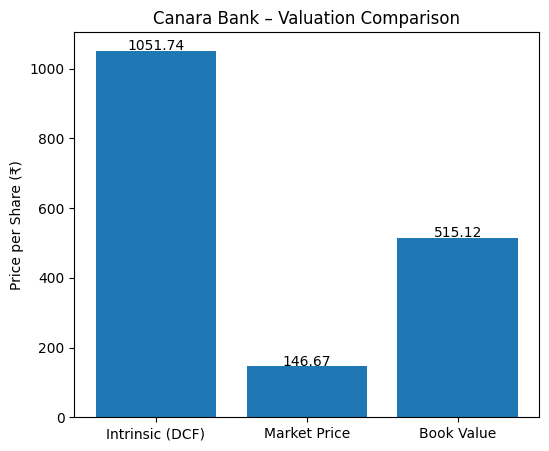

In [52]:
valuation_labels = ["Intrinsic (DCF)", "Market Price", "Book Value"]
valuation_values = [intrinsic_value_per_share, current_price, book_value_per_share]

plt.figure(figsize=(6,5))
plt.bar(valuation_labels, valuation_values)
plt.title("Canara Bank – Valuation Comparison")
plt.ylabel("Price per Share (₹)")

# Add value labels
for i, v in enumerate(valuation_values):
    plt.text(i, v + 2, f"{v:.2f}", ha='center')

plt.show()


In [ ]:
#Reliance LTD
balance_sheet = pd.read_excel("Copy of balance_sheet_reliance_ltd.xlsx")
income_statement = pd.read_excel("Copy of Financial_statement_-_P&L_Reliance_Ltd.xlsx")
cash_flow = pd.read_excel("Copy of cash_flow_reliancee_ltd.xlsx")


In [54]:
balance_sheet.set_index('Year', inplace =True )
income_statement.set_index('Year', inplace = True)
cash_flow.set_index('Year', inplace=True)

In [55]:
print(f"balance_sheet.columns{balance_sheet.columns}")
print(f"balance_sheet.index{balance_sheet.index}")
print(f"income_statement.index{income_statement.index}")
print(f"income_statement.columns{income_statement.columns}")
print(f"cash_flow index {(cash_flow.index).to_list()}")
print(f"cash_flow.columns{cash_flow.columns}")

balance_sheet.columnsIndex(['Mar '25', 'Mar '24', 'Mar '23'], dtype='object')
balance_sheet.indexIndex(['Total Share Capital', 'Equity Share Capital', 'Reserves', 'Networth',
       'Secured Loans', 'Unsecured Loans', 'Total Debt', 'Total Liabilities',
       'Gross Block', 'Less: Accum. Depreciation', 'Net Block',
       'Capital Work in Progress', 'Investments', 'Inventories',
       'Sundry Debtors', 'Cash and Bank Balance', 'Total Current Assets',
       'Loans and Advances', 'Total CA, Loans & Advances',
       'Current Liabilities', 'Provisions', 'Total CL & Provisions',
       'Net Current Assets', 'Total Assets', 'Contingent Liabilities',
       'Book Value (Rs)'],
      dtype='object', name='Year')
income_statement.indexIndex(['Sales Turnover', 'Excise Duty', 'Net Sales', 'Other Income',
       'Stock Adjustments', 'Total Income', 'Raw Materials',
       'Power & Fuel Cost', 'Employee Cost', 'Other Manufacturing Expenses',
       'Miscellaneous Expenses', 'Total Expenses', 'Op

In [ ]:
years = ['Mar \'25', 'Mar \'24', 'Mar \'23']

# Helper function to get average for current and previous year
def get_avg(df, row, year):
    idx = years.index(year)
    if idx == 0:
        return df.loc[row, year]  # No prior year, use current
    prev_year = years[idx - 1]
    return (df.loc[row, year] + df.loc[row, prev_year]) / 2

# 1. PROFITABILITY RATIOS
print("=== PROFITABILITY RATIOS ===")
for year in years:
    net_sales = income_statement.loc['Net Sales', year]
    # Approximate COGS: Raw Materials + Power & Fuel Cost + Other Manufacturing Expenses
    cogs = (income_statement.loc['Raw Materials', year] + 
            income_statement.loc['Power & Fuel Cost', year] + 
            income_statement.loc['Other Manufacturing Expenses', year])
    gross_profit = net_sales - cogs
    gpm = (gross_profit / net_sales * 100) if net_sales != 0 else np.nan
    
    net_profit = income_statement.loc['Reported Net Profit', year]
    npm = (net_profit / net_sales * 100) if net_sales != 0 else np.nan
    
    networth = balance_sheet.loc['Networth', year]
    roe = (net_profit / networth * 100) if networth != 0 else np.nan
    
    total_assets = balance_sheet.loc['Total Assets', year]
    roa = (net_profit / total_assets * 100) if total_assets != 0 else np.nan
    
    print(f"\n{year}:")
    print(f"  Gross Profit Margin: {gpm:.2f}%")
    print(f"  Net Profit Margin: {npm:.2f}%")
    print(f"  ROE: {roe:.2f}%")
    print(f"  ROA: {roa:.2f}%")

# 2. LIQUIDITY RATIOS
print("\n=== LIQUIDITY RATIOS ===")
for year in years:
    current_assets = balance_sheet.loc['Total Current Assets', year]
    current_liab = balance_sheet.loc['Total CL & Provisions', year]
    cr = current_assets / current_liab if current_liab != 0 else np.nan
    
    inventories = balance_sheet.loc['Inventories', year]
    quick_assets = current_assets - inventories  # Simplified; excludes prepaids if any
    qr = quick_assets / current_liab if current_liab != 0 else np.nan
    
    print(f"\n{year}:")
    print(f"  Current Ratio: {cr:.2f}")
    print(f"  Quick Ratio: {qr:.2f}")

# 3. SOLVENCY RATIOS
print("\n=== SOLVENCY RATIOS ===")
for year in years:
    total_debt = balance_sheet.loc['Total Debt', year]
    networth = balance_sheet.loc['Networth', year]
    de = total_debt / networth if networth != 0 else np.nan
    
    ebit = income_statement.loc['Operating Profit', year]  # Approx EBIT
    interest = income_statement.loc['Interest', year]
    icr = ebit / interest if interest != 0 else np.nan
    
    print(f"\n{year}:")
    print(f"  Debt to Equity: {de:.2f}")
    print(f"  Interest Coverage: {icr:.2f}")

# 4. EFFICIENCY RATIOS
print("\n=== EFFICIENCY RATIOS ===")
for year in years:
    net_sales = income_statement.loc['Net Sales', year]
    # COGS as above
    cogs = (income_statement.loc['Raw Materials', year] + 
            income_statement.loc['Power & Fuel Cost', year] + 
            income_statement.loc['Other Manufacturing Expenses', year])
    
    avg_inv = get_avg(balance_sheet, 'Inventories', year)
    inv_turn = cogs / avg_inv if avg_inv != 0 else np.nan
    
    avg_rec = get_avg(balance_sheet, 'Sundry Debtors', year)
    rec_turn = net_sales / avg_rec if avg_rec != 0 else np.nan
    
    avg_assets = get_avg(balance_sheet, 'Total Assets', year)
    tat = net_sales / avg_assets if avg_assets != 0 else np.nan
    
    print(f"\n{year}:")
    print(f"  Inventory Turnover: {inv_turn:.2f}")
    print(f"  Receivables Turnover: {rec_turn:.2f}")
    print(f"  Total Assets Turnover: {tat:.2f}")

=== PROFITABILITY RATIOS ===

Mar '25:
  Gross Profit Margin: 14.39%
  Net Profit Margin: 6.82%
  ROE: 6.49%
  ROA: 4.75%

Mar '24:
  Gross Profit Margin: 19.58%
  Net Profit Margin: 7.87%
  ROE: 8.16%
  ROA: 5.78%

Mar '23:
  Gross Profit Margin: 15.60%
  Net Profit Margin: 8.37%
  ROE: 9.23%
  ROA: 6.36%

=== LIQUIDITY RATIOS ===

Mar '25:
  Current Ratio: 0.67
  Quick Ratio: 0.35

Mar '24:
  Current Ratio: 0.73
  Quick Ratio: 0.36

Mar '23:
  Current Ratio: 0.63
  Quick Ratio: 0.38

=== SOLVENCY RATIOS ===

Mar '25:
  Debt to Equity: 0.37
  Interest Coverage: 5.78

Mar '24:
  Debt to Equity: 0.41
  Interest Coverage: 5.53

Mar '23:
  Debt to Equity: 0.45
  Interest Coverage: 5.20

=== EFFICIENCY RATIOS ===

Mar '25:
  Inventory Turnover: 4.96
  Receivables Turnover: 33.18
  Total Assets Turnover: 0.70

Mar '24:
  Inventory Turnover: 4.93
  Receivables Turnover: 35.25
  Total Assets Turnover: 0.73

Mar '23:
  Inventory Turnover: 6.65
  Receivables Turnover: 33.40
  Total Assets Turno

In [ ]:
# AUTO TERMINAL GROWTH RATE: Conservative Avg from IMF/World Bank Forecasts (2025-2030)
# Based on latest data: ~6.5% real GDP avg; use 5.0% nominal perpetuity (conservative)
terminal_growth_rate_raw = 0.065  # Avg from sources (update via search)
terminal_growth_rate = max(0, min(terminal_growth_rate_raw - 0.015, 0.06))  # Adjust down 1.5% for risk, cap 0-6%
print("AUTO Terminal Growth Rate (IMF/World Bank Avg, Conservative):", round(terminal_growth_rate * 100, 1), "%")

# Fetch 5-year daily price data for Reliance vs Nifty 50 (relevant benchmark for conglomerate)
reliance = yf.download('RELIANCE.NS', period='5y', auto_adjust=False, progress=False)['Adj Close']
nifty_50 = yf.download('^NSEI', period='5y', auto_adjust=False, progress=False)['Adj Close']

# Daily returns
returns_rel = reliance.pct_change().dropna()
returns_nifty = nifty_50.pct_change().dropna()

# Align dates
common_dates = returns_rel.index.intersection(returns_nifty.index)
returns_rel = returns_rel.loc[common_dates]
returns_nifty = returns_nifty.loc[common_dates]

# If either dataset is empty
if len(returns_rel) == 0 or len(returns_nifty) == 0:
    beta = 1.0
else:
    # Convert to arrays
    r_rel = returns_rel.values.flatten()
    r_nifty = returns_nifty.values.flatten()

    # Calculate beta = Cov(R_reliance, R_nifty50) / Var(R_nifty50)
    cov = np.cov(r_rel, r_nifty)[0][1]
    var = np.var(r_nifty)

    beta = cov / var if var > 0 else 1.0

print("Reliance Industries Beta vs NIFTY 50:", round(beta, 2))

AUTO Terminal Growth Rate (IMF/World Bank Avg, Conservative): 5.0 %
Reliance Industries Beta vs NIFTY 50: 1.11


In [ ]:
# AUTO WACC USING CAPM
risk_free_rate = 0.071    # India 10yr G-Sec yield
market_risk_premium = 0.06

# [Insert the beta calculation code from above here]


beta = beta  # From calculation above
discount_rate = risk_free_rate + beta * market_risk_premium
discount_rate = float(discount_rate)
print("AUTO Discount Rate (WACC/Cost of Equity):", round(discount_rate * 100, 2), "%")

# Helper function (updated to return np.nan)
def safe_loc(df, key, year):
    if key in df.index:
        return df.loc[key, year]
    return np.nan  # Use np.nan for boolean compatibility

# AUTO GROWTH RATE: 5-Year CAGR of Net Profit (using 'Reported Net Profit' from provided data)
num_years = 5  # Target period
available_years = len(income_statement.columns)
use_years = min(num_years, available_years)

if use_years >= 2:
    years = income_statement.columns[-use_years:]
    net_profits = []
    for y in years:
        # Prioritize keys; assign first non-NaN value (Reliance uses 'Reported Net Profit')
        np_val = np.nan
        for key in ["Reported Net Profit", "Net Income", "Net Income Common Stockholders"]:
            val = safe_loc(income_statement, key, y)
            if pd.notna(val):
                np_val = val
                break  # Stop at first valid
        
        if pd.notna(np_val) and np_val > 0:
            net_profits.append(float(np_val))
    
    if len(net_profits) >= 2:
        cagr = (net_profits[-1] / net_profits[0]) ** (1 / (len(net_profits) - 1)) - 1
        growth_rate = max(0, min(cagr, 0.15))  # Cap 0-15%
        print("AUTO Growth Rate (5Y Net Profit CAGR):", round(growth_rate * 100, 1), "%")
    else:
        growth_rate = 0.05
        print(f"Growth Rate (Fallback): 5.0% (Only {len(net_profits)} valid years of positive net profits)")
else:
    growth_rate = 0.05
    print("Growth Rate (Fallback): 5.0% (Limited historical data)")

print("Final growth_rate in %:", growth_rate * 100)
print("Final growth_rate:", growth_rate)

AUTO Discount Rate (WACC/Cost of Equity): 13.78 %
AUTO Growth Rate (5Y Net Profit CAGR): 12.0 %
Final growth_rate in %: 11.964985168097808
Final growth_rate: 0.11964985168097808


In [59]:
# --------------------------------------------------------
# 1. BASIC SETUP: TICKER & LATEST YEAR
# --------------------------------------------------------
ticker_symbol = "RELIANCE.NS"
reliance = yf.Ticker(ticker_symbol)

latest_year = "Mar '25"   # From provided data

# --------------------------------------------------------
# 2. FETCH MARKET DATA FROM YFINANCE
# --------------------------------------------------------
hist = reliance.history(period="1d")
current_price = float(hist["Close"][-1])

info = reliance.info  # dictionary of fundamentals

# Market Cap and Shares Outstanding
if "marketCap" in info and info["marketCap"] is not None:
    market_cap = float(info["marketCap"])
else:
    market_cap = np.nan

if "sharesOutstanding" in info and info["sharesOutstanding"] is not None:
    shares_outstanding = float(info["sharesOutstanding"])
else:
    # fallback: approximate from Equity Share Capital if needed
    # Equity Share Capital in crore, assume face value = ₹10
    equity_capital_crore = balance_sheet.loc["Equity Share Capital", latest_year]
    equity_capital = equity_capital_crore * 1e7  # crore to rupees
    shares_outstanding = equity_capital / 10     # assuming FV = ₹10

# Enterprise Value (EV) if available
if "enterpriseValue" in info and info["enterpriseValue"] is not None:
    enterprise_value = float(info["enterpriseValue"])
else:
    enterprise_value = market_cap  # approximation

print("Current Share Price (₹):", round(current_price, 2))
print("Market Cap (₹):", market_cap)
print("Shares Outstanding:", shares_outstanding)
print("Enterprise Value (₹):", enterprise_value)

# --------------------------------------------------------
# 3. EXTRACT KEY FINANCIALS FROM YOUR STATEMENTS
# --------------------------------------------------------
# Income statement data (adjusted keys for Reliance data)
total_income = income_statement.loc["Total Income", latest_year]
net_profit = income_statement.loc["Reported Net Profit", latest_year]
eps = income_statement.loc["Earning Per Share (Rs)", latest_year]
interest_exp = income_statement.loc["Interest", latest_year]
depr = income_statement.loc["Depreciation", latest_year]

# Balance sheet data (adjusted for Reliance)
equity = balance_sheet.loc["Networth", latest_year]  # Reliance uses 'Networth'
book_value_per_share = income_statement.loc["Book Value (Rs)", latest_year]

# Cash flow data
net_cfo = cash_flow.loc["Net Cash From Operating Activities", latest_year]  # proxy for FCF

print("\n=== Key Financials (Latest Year) ===")
print("Total Income (₹ crore):", total_income)
print("Net Profit (₹ crore):", net_profit)
print("EPS (₹):", eps)
print("Book Value per Share (₹):", book_value_per_share)
print("Net Cash from Operating Activities (₹ crore) [FCF proxy]:", net_cfo)

# --------------------------------------------------------
# 4. DCF VALUATION
# --------------------------------------------------------
# Assumptions (from auto calcs)
fcf_base = net_cfo             # in ₹ crore
growth_rate = 0.11964985168097808  # From auto calc (12.0%)
discount_rate = 0.1378         # From auto calc (13.78%)
terminal_growth_rate = 0.05    # From auto calc (5.0%)
projection_years = 5

# Project FCFs for next 5 years
fcf_list = []
for t in range(1, projection_years + 1):
    fcf_t = fcf_base * ((1 + growth_rate) ** t)
    fcf_list.append(fcf_t)

# Discount the projected FCFs to present value
pv_fcf_list = []
for t in range(1, projection_years + 1):
    pv_t = fcf_list[t-1] / ((1 + discount_rate) ** t)
    pv_fcf_list.append(pv_t)

# Terminal Value at end of Year 5 (in crore)
terminal_value = fcf_list[-1] * (1 + terminal_growth_rate) / (discount_rate - terminal_growth_rate)
pv_terminal_value = terminal_value / ((1 + discount_rate) ** projection_years)

# Enterprise Value from DCF (in crore)
dcf_enterprise_value_crore = sum(pv_fcf_list) + pv_terminal_value

# Convert to rupees (since market cap from yfinance is in rupees)
dcf_enterprise_value = dcf_enterprise_value_crore * 1e7  # crore → rupees

# Intrinsic equity value ≈ EV if we ignore net debt details for now
intrinsic_equity_value = dcf_enterprise_value

intrinsic_value_per_share = intrinsic_equity_value / shares_outstanding

print("\n=== DCF Valuation ===")
print("Projected FCFs (₹ crore):", [round(x, 2) for x in fcf_list])
print("PV of FCFs (₹ crore):", [round(x, 2) for x in pv_fcf_list])
print("PV of Terminal Value (₹ crore):", round(pv_terminal_value, 2))
print("DCF Enterprise/Equity Value (₹ crore):", round(dcf_enterprise_value_crore, 2))
print("Intrinsic Value per Share (₹):", round(intrinsic_value_per_share, 2))
print("Current Market Price (₹):", round(current_price, 2))

if intrinsic_value_per_share > current_price * 1.1:
    conclusion_dcf = "Undervalued (DCF suggests upside)"
elif intrinsic_value_per_share < current_price * 0.9:
    conclusion_dcf = "Overvalued (DCF suggests downside)"
else:
    conclusion_dcf = "Fairly valued (DCF close to market price)"

print("DCF Valuation Conclusion:", conclusion_dcf)

# --------------------------------------------------------
# 5. MULTIPLES VALUATION: P/E, P/B, EV/EBITDA
# --------------------------------------------------------

# P/E using EPS from your statement
pe_manual = current_price / eps

# P/B using Book Value per Share
pb_manual = current_price / book_value_per_share

# EBITDA ≈ EBIT + Depreciation
pbt = income_statement.loc["Profit Before Tax", latest_year]  # Use income PBT for consistency
ebit = pbt + interest_exp        # EBIT in ₹ crore
ebitda_crore = ebit + depr       # EBITDA approx in ₹ crore

# EV/EBITDA
# Need EV in crore for consistency
ev_crore = enterprise_value / 1e7
if ebitda_crore != 0:
    ev_ebitda = ev_crore / ebitda_crore
else:
    ev_ebitda = np.nan

print("\n=== Multiples Valuation ===")
print("P/E (Price / EPS):", round(pe_manual, 2))
print("P/B (Price / Book Value per Share):", round(pb_manual, 2))
print("EV/EBITDA:", round(ev_ebitda, 2))

# If yfinance provides their own PE & PB, print for comparison
if "trailingPE" in info and info["trailingPE"] is not None:
    print("Trailing PE (yfinance):", round(info["trailingPE"], 2))
if "priceToBook" in info and info["priceToBook"] is not None:
    print("Price to Book (yfinance):", round(info["priceToBook"], 2))

C:\Users\Predator\AppData\Local\Temp\ipykernel_59940\3528773226.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = float(hist["Close"][-1])


Current Share Price (₹): 1535.9
Market Cap (₹): 20785290805248.0
Shares Outstanding: 13532472634.0
Enterprise Value (₹): 24176108765184.0

=== Key Financials (Latest Year) ===
Total Income (₹ crore): 544122.0
Net Profit (₹ crore): 35262.0
EPS (₹): 26.06
Book Value per Share (₹): 401.32
Net Cash from Operating Activities (₹ crore) [FCF proxy]: 178703

=== DCF Valuation ===
Projected FCFs (₹ crore): [np.float64(200084.79), np.float64(224024.9), np.float64(250829.45), np.float64(280841.16), np.float64(314443.76)]
PV of FCFs (₹ crore): [np.float64(175852.34), np.float64(173047.14), np.float64(170286.7), np.float64(167570.29), np.float64(164897.22)]
PV of Terminal Value (₹ crore): 1972005.46
DCF Enterprise/Equity Value (₹ crore): 2823659.16
Intrinsic Value per Share (₹): 2086.58
Current Market Price (₹): 1535.9
DCF Valuation Conclusion: Undervalued (DCF suggests upside)

=== Multiples Valuation ===
P/E (Price / EPS): 58.94
P/B (Price / Book Value per Share): 3.83
EV/EBITDA: 32.6
Trailing PE

In [60]:
# Correct year order for trend: oldest → newest
years = ["Mar '23", "Mar '24", "Mar '25"]
# Safe averaging function (no more AttributeError)
def avg(df, row, year, year_list):
    idx = year_list.index(year)
    if idx == 0:
        return df.loc[row, year]
    prev_year = year_list[idx - 1]
    return (df.loc[row, year] + df.loc[row, prev_year]) / 2


=== TREND DATAFRAME ===
         Gross Profit Margin  Net Profit Margin       ROE       ROA  \
Mar '23            15.603759           8.367167  9.226791  6.361191   
Mar '24            19.575181           7.865169  8.161974  5.783851   
Mar '25            14.392799           6.815902  6.492882  4.752932   

         Current Ratio  Quick Ratio  Debt to Equity  Interest Coverage  \
Mar '23       0.626814     0.376743        0.450482           5.199430   
Mar '24       0.726457     0.360840        0.411166           5.529784   
Mar '25       0.667655     0.349596        0.366079           5.775711   

         Inventory Turnover  Receivables Turnover  Total Asset Turnover  
Mar '23            9.113314             31.264943              0.760256  
Mar '24            6.415143             33.790632              0.751910  
Mar '25            5.081438             34.113547              0.704458  


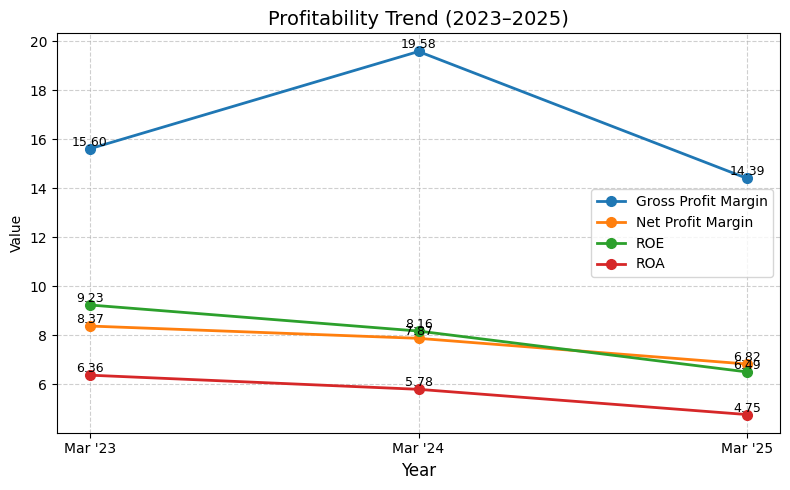

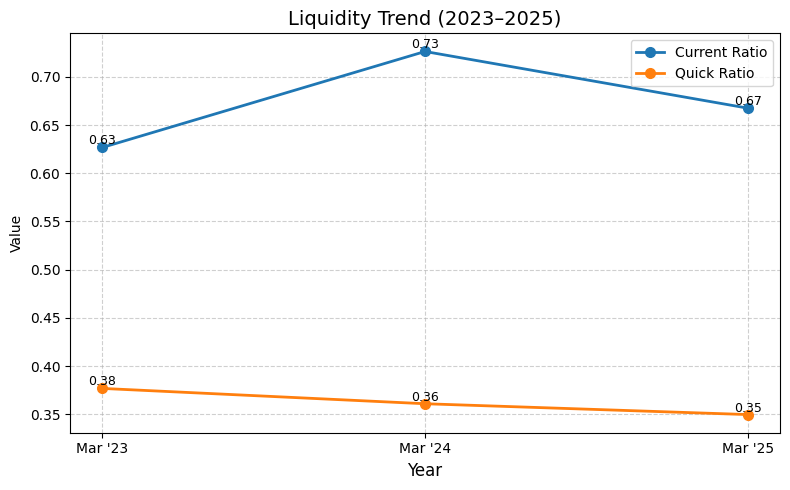

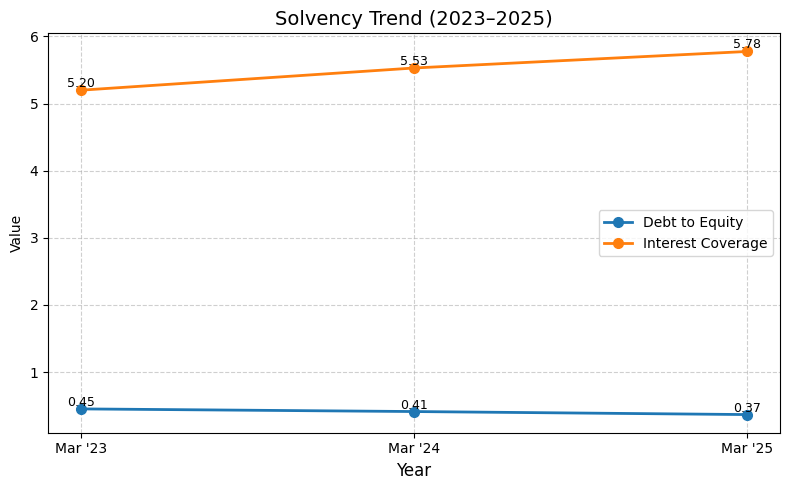

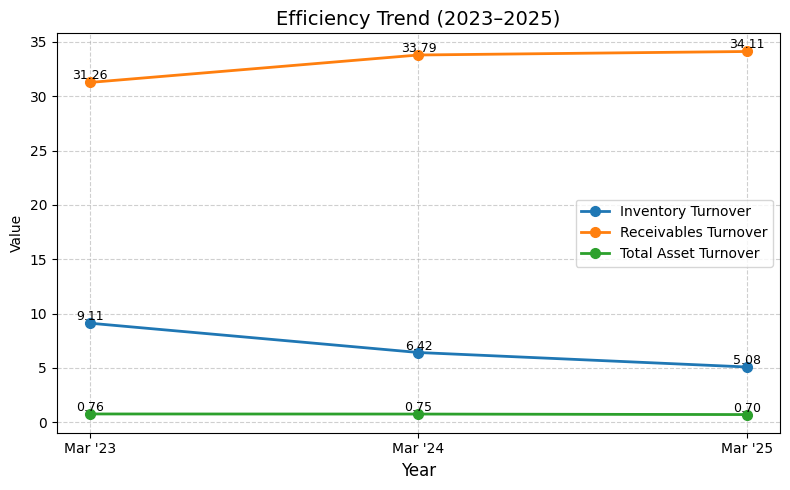

In [ ]:
# ---------------------------
# CREATE TREND DATAFRAME FIRST
# ---------------------------
trend_df = pd.DataFrame(index=years)

# ---- PROFITABILITY ----
trend_df["Gross Profit Margin"] = [
    ((income_statement.loc['Net Sales', y] -
      (income_statement.loc['Raw Materials', y] +
       income_statement.loc['Power & Fuel Cost', y] +
       income_statement.loc['Other Manufacturing Expenses', y]
      )) / income_statement.loc['Net Sales', y]) * 100
    for y in years
]

trend_df["Net Profit Margin"] = [
    (income_statement.loc['Reported Net Profit', y] /
     income_statement.loc['Net Sales', y]) * 100
    for y in years
]

trend_df["ROE"] = [
    (income_statement.loc['Reported Net Profit', y] /
     balance_sheet.loc['Networth', y]) * 100
    for y in years
]

trend_df["ROA"] = [
    (income_statement.loc['Reported Net Profit', y] /
     balance_sheet.loc['Total Assets', y]) * 100
    for y in years
]

# ---- LIQUIDITY ----
trend_df["Current Ratio"] = [
    balance_sheet.loc['Total Current Assets', y] /
    balance_sheet.loc['Total CL & Provisions', y]
    for y in years
]

trend_df["Quick Ratio"] = [
    (balance_sheet.loc['Total Current Assets', y] -
     balance_sheet.loc['Inventories', y]) /
    balance_sheet.loc['Total CL & Provisions', y]
    for y in years
]

# ---- SOLVENCY ----
trend_df["Debt to Equity"] = [
    balance_sheet.loc['Total Debt', y] /
    balance_sheet.loc['Networth', y]
    for y in years
]

trend_df["Interest Coverage"] = [
    income_statement.loc['Operating Profit', y] /
    income_statement.loc['Interest', y]
    for y in years
]

# ---- EFFICIENCY ----
def avg(df, row, year):
    idx = years.index(year)
    if idx == 0:
        return df.loc[row, year]
    prev_year = years[idx - 1]
    return (df.loc[row, year] + df.loc[row, prev_year]) / 2

trend_df["Inventory Turnover"] = [
    (
        (income_statement.loc['Raw Materials', y] +
         income_statement.loc['Power & Fuel Cost', y] +
         income_statement.loc['Other Manufacturing Expenses', y])
        / avg(balance_sheet, 'Inventories', y)
    )
    for y in years
]

trend_df["Receivables Turnover"] = [
    income_statement.loc['Net Sales', y] /
    avg(balance_sheet, 'Sundry Debtors', y)
    for y in years
]

trend_df["Total Asset Turnover"] = [
    income_statement.loc['Net Sales', y] /
    avg(balance_sheet, 'Total Assets', y)
    for y in years
]

# SHOW DF
print("=== TREND DATAFRAME ===")
print(trend_df)

# ---------------------------
# PLOT FUNCTION (WITH VALUES)
# ---------------------------
def plot_trend(columns, title):
    plt.figure(figsize=(8, 5))

    for col in columns:
        y = trend_df[col]

        plt.plot(
            trend_df.index,
            y,
            marker='o',
            markersize=7,
            linewidth=2,
            label=col
        )

        # Add value labels
        for i, val in enumerate(y):
            plt.text(
                i,
                val,
                f"{val:.2f}",
                ha='center',
                va='bottom',
                fontsize=9
            )

    plt.title(title, fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Value")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---------------------------
# GENERATE PLOTS
# ---------------------------
plot_trend(
    ["Gross Profit Margin", "Net Profit Margin", "ROE", "ROA"],
    "Profitability Trend (2023–2025)"
)

plot_trend(
    ["Current Ratio", "Quick Ratio"],
    "Liquidity Trend (2023–2025)"
)

plot_trend(
    ["Debt to Equity", "Interest Coverage"],
    "Solvency Trend (2023–2025)"
)

plot_trend(
    ["Inventory Turnover", "Receivables Turnover", "Total Asset Turnover"],
    "Efficiency Trend (2023–2025)"
)


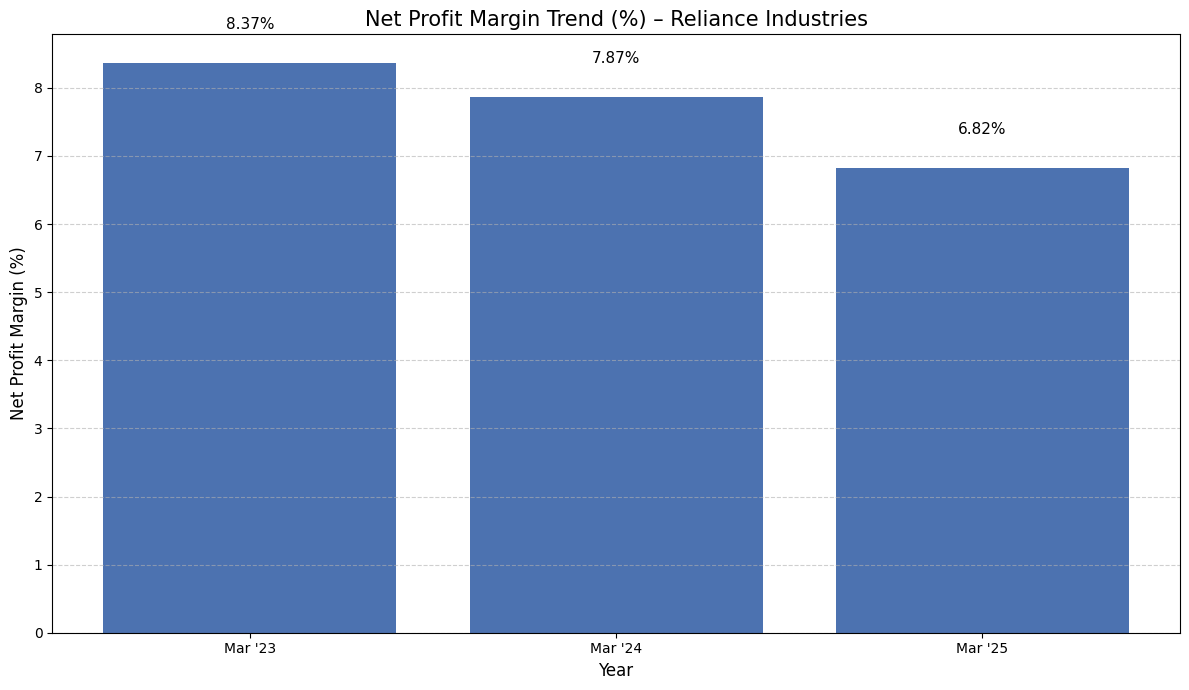

In [62]:
import matplotlib.pyplot as plt

# Years in correct order
years_rel = ["Mar '23", "Mar '24", "Mar '25"]

# Compute Net Profit Margin for Reliance
npm_rel = []

for y in years_rel:
    net_profit = income_statement.loc["Reported Net Profit", y]
    net_sales = income_statement.loc["Net Sales", y]
    npm = (net_profit / net_sales) * 100
    npm_rel.append(npm)

# Plot
plt.figure(figsize=(12,7))
bars = plt.bar(years_rel, npm_rel, color="#4C72B0")

plt.title("Net Profit Margin Trend (%) – Reliance Industries", fontsize=15)
plt.ylabel("Net Profit Margin (%)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add labels on top
for bar, val in zip(bars, npm_rel):
    plt.text(bar.get_x() + bar.get_width()/2,
             val + 0.5,
             f"{val:.2f}%",
             ha='center', fontsize=11)

plt.tight_layout()
plt.show()


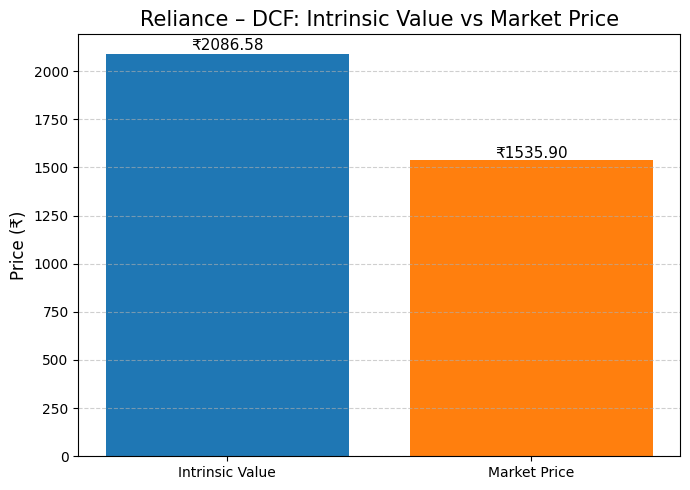

In [63]:
plt.figure(figsize=(7,5))
labels = ["Intrinsic Value", "Market Price"]
values = [intrinsic_value_per_share, current_price]

bars = plt.bar(labels, values, color=["#1f77b4", "#ff7f0e"])

plt.title("Reliance – DCF: Intrinsic Value vs Market Price", fontsize=15)
plt.ylabel("Price (₹)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + height*0.01,
             f"₹{height:.2f}",
             ha='center', fontsize=11)

plt.tight_layout()
plt.show()


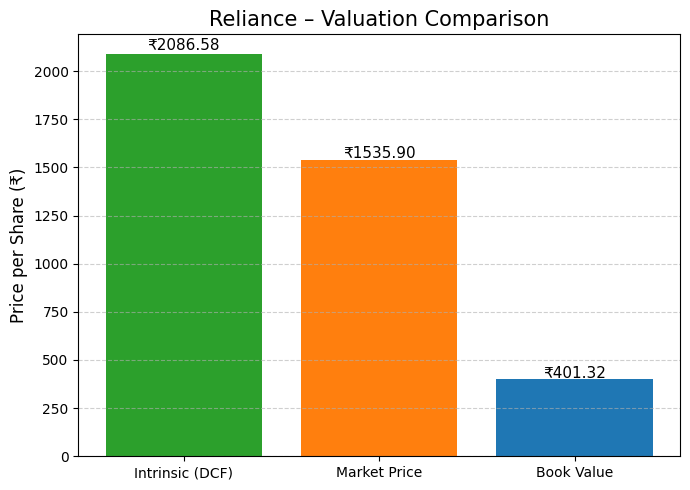

In [64]:
valuation_labels = ["Intrinsic (DCF)", "Market Price", "Book Value"]
valuation_values = [intrinsic_value_per_share, current_price, book_value_per_share]

plt.figure(figsize=(7,5))
bars = plt.bar(valuation_labels, valuation_values, color=["#2ca02c", "#ff7f0e", "#1f77b4"])

plt.title("Reliance – Valuation Comparison", fontsize=15)
plt.ylabel("Price per Share (₹)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, v in enumerate(valuation_values):
    plt.text(i, v + v*0.01, f"₹{v:.2f}", ha='center', fontsize=11)

plt.tight_layout()
plt.show()
